In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# datapathing
import os

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
# train_df.count()

In [6]:
some_digit_index = 5135
some_digit_label = train_df.iloc[some_digit_index].loc["label"]
some_digit_data = train_df.iloc[some_digit_index].drop("label")

In [7]:
# train_df['label']

In [8]:
some_digit_label

9

In [9]:
# some_digit_data

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(mnist_digit_data):
    digit_img = some_digit_data.values.reshape(28, 28)
    plt.imshow(digit_img, interpolation='nearest', cmap=plt.cm.binary)
    plt.axis("off")
    plt.show()

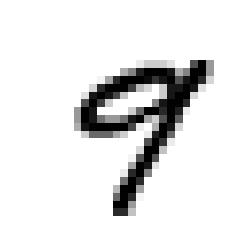

In [11]:
plot_digit(some_digit_data)

In [12]:
mnist_train_data = pd.read_csv("majid.csv")

In [13]:
# mnist_train_data = train_df.drop("label", axis=1).copy()
mnist_train_labels = train_df["label"].copy()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(mnist_train_data, mnist_train_labels)

MemoryError: 

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, mnist_train_data, mnist_train_labels, cv=3, scoring="accuracy") 

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(mnist_train_data, mnist_train_labels)

In [ ]:
cross_val_score(log_clf, mnist_train_data, mnist_train_labels, cv=3, scoring="accuracy")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(mnist_train_data, mnist_train_labels)

In [ ]:
cross_val_score(forest_clf, mnist_train_data, mnist_train_labels, cv=3, scoring="accuracy")

In [ ]:
mnist_test_data = pd.read_csv("datasets/test.csv")
final_predictions = knn_clf.predict(mnist_test_data)

In [ ]:
final_df = pd.DataFrame({'ImageId': range(1, len(final_predictions)+1), 'Label': final_predictions})
final_df.to_csv("submission2.csv", index=False)